In [142]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import glob

In [143]:
def gaussFit(x, a, x0, sigma):
    gauss = a*np.exp(-(x-x0)**2/(2*sigma**2))
    return gauss


Gp3_data_E1/co60\Co60_30_1_805v.csv
[140, 6800, 175]
[ 122.15905739 6836.1320729   196.08030422]
Centre: 6836.132072901514 +/- 196.08030421864012
[140, 7800, 250]
[ 110.         7755.68868974  172.37466835]
Centre: 7755.688689744909 +/- 172.37466834812895


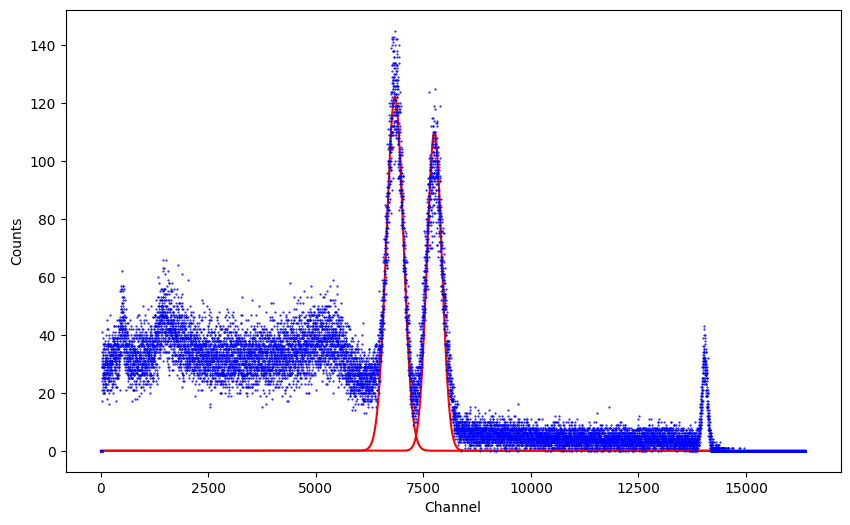

Gp3_data_E1/co60\Co60_30_2_805v.csv
[140, 6800, 175]
[ 124.03766282 6852.63485357  199.05133104]
Centre: 6852.634853568473 +/- 199.05133103723978
[140, 7800, 250]
[ 110.         7765.0847288   177.81336025]
Centre: 7765.084728801807 +/- 177.81336024504023


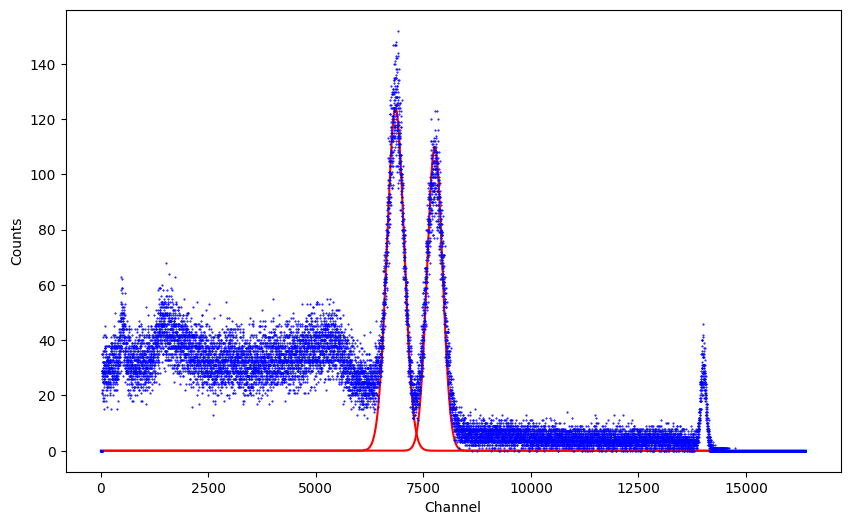

Gp3_data_E1/co60\Co60_30_3_805v.csv
[140, 6800, 175]
[ 124.38474449 6839.39066165  196.14713824]
Centre: 6839.390661649949 +/- 196.14713824279409
[140, 7800, 250]
[ 110.         7754.13686995  177.03521245]
Centre: 7754.136869945644 +/- 177.03521244862603


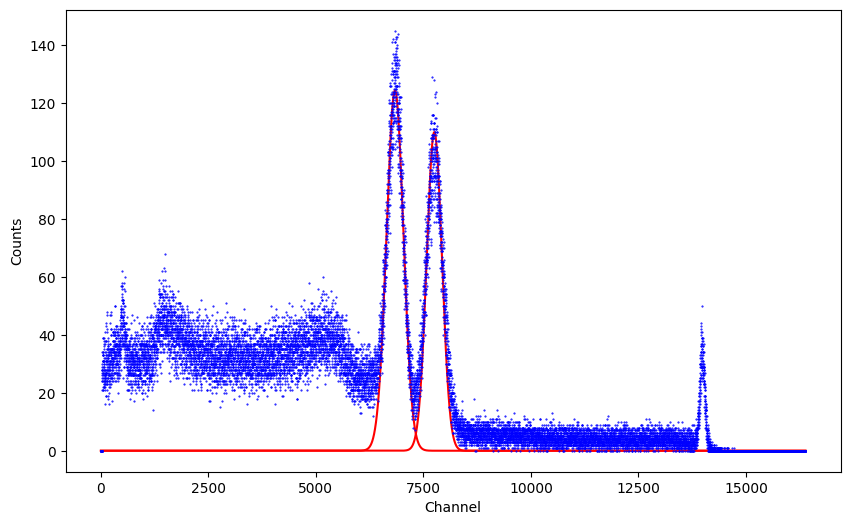

In [144]:
co60files = glob.glob('Gp3_data_E1/co60/*.csv')
with open("co60Fits.csv", "w") as fp:
    fp.write("Peak1,Peak1Error,Peak2,Peak2Error\n")
    for co60file in co60files:
        print(co60file)
        data = pd.read_csv(co60file, skiprows=6)
        #using poisson errors
        data["uncs"] = np.sqrt(data["Counts"]) + 1e-9
        plt.figure(figsize=(10, 6))
        p0s = [[140, 6800, 175], [140, 7800, 250]]
        for i, p0 in enumerate(p0s):
            print(p0)
            bounds = [[p0[0]-30, p0[1]-200, p0[2]-200], [p0[0]+30, p0[1]+200, p0[2]+200]]
            popt, pcov = curve_fit(gaussFit, data["Channel"].to_numpy()[p0[1]-200:p0[1]+200], data["Counts"].to_numpy()[p0[1]-200:p0[1]+200], p0=p0, bounds=bounds, sigma=data["uncs"].to_numpy()[p0[1]-200:p0[1]+200])
            print(popt)
            centre = popt[1]
            error = popt[2]
            # error = np.sqrt(np.diag(pcov))[1]
            if i == 0:
                fp.write(f"{centre},{error}")
            else:
                fp.write(f",{centre},{error}")
            
            print(f"Centre: {centre} +/- {error}")
            plt.plot(data["Channel"], gaussFit(data["Channel"], *popt), 'r-')
        plt.plot(data["Channel"], data["Counts"],'bo', label=co60file, markersize=0.5)
        plt.xlabel('Channel')
        plt.ylabel('Counts')
        plt.show()
        fp.write("\n")


Gp3_data_E1/na22\Na22_804_1.csv
[3440.35292972 2901.95059436  227.16922981]
Centre: 2901.950594355946 +/- 227.16922981352195
[ 501.00889544 7348.73454154  361.03968324]
Centre: 7348.734541539765 +/- 361.0396832377387
[  311.83056181 10522.41472584   271.75676745]
Centre: 10522.414725843524 +/- 271.7567674520952


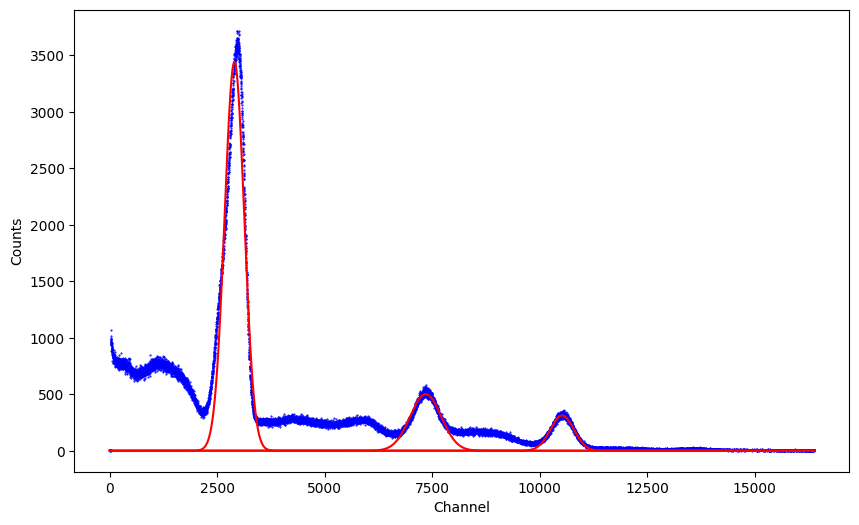

Gp3_data_E1/na22\Na22_804_2.csv
[3438.14777009 2901.74110389  227.39157469]
Centre: 2901.7411038868754 +/- 227.39157468809626
[ 503.89866147 7349.18670265  357.3392201 ]
Centre: 7349.186702652087 +/- 357.33922010361044
[  310.55603028 10522.99452952   272.96401923]
Centre: 10522.994529519892 +/- 272.9640192252592


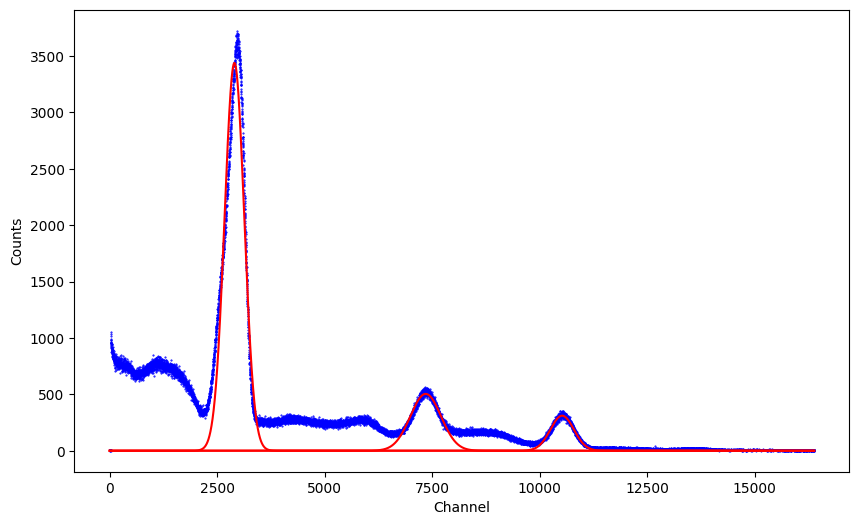

Gp3_data_E1/na22\Na22_804_3.csv
[3455.11544466 2897.0625303   224.84633574]
Centre: 2897.0625303036195 +/- 224.84633574336803
[ 498.84567083 7332.75308852  364.33946365]
Centre: 7332.7530885156775 +/- 364.33946365340836
[  312.5036253  10504.88420936   270.15808534]
Centre: 10504.884209362737 +/- 270.1580853383242


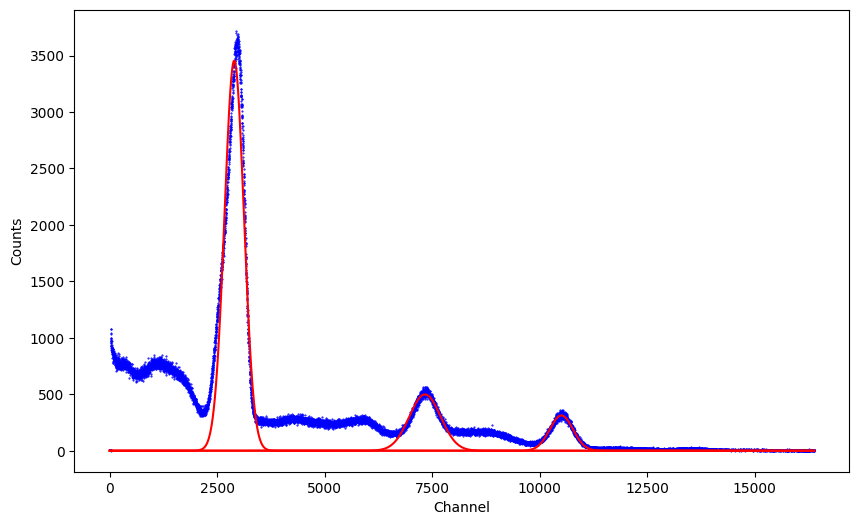

In [145]:
co60files = glob.glob('Gp3_data_E1/na22/*.csv')
with open("na22Fits.csv", "w") as fp:
    fp.write("Peak1,Peak1Error,Peak2,Peak2Error,Peak3,Peak3Error\n")
    for co60file in co60files:
        print(co60file)
        data = pd.read_csv(co60file, skiprows=6)
        #using poisson errors
        data["uncs"] = np.sqrt(data["Counts"]) + 1e-9
        plt.figure(figsize=(10, 6))
        p0s = [[3500, 2900, 300], [700, 7500, 300], [400, 10500, 300]]
        plt.plot(data["Channel"], data["Counts"],'bo', label=co60file, markersize=0.5)
        for i, p0 in enumerate(p0s):
            bounds = [[p0[0]-500, p0[1]-500, p0[2]-200], [p0[0]+500, p0[1]+500, p0[2]+200]]
            popt, pcov = curve_fit(gaussFit, data["Channel"].to_numpy()[p0[1]-400:p0[1]+400], data["Counts"].to_numpy()[p0[1]-400:p0[1]+400], p0=p0, bounds=bounds, sigma=data["uncs"].to_numpy()[p0[1]-400:p0[1]+400])
            print(popt)
            centre = popt[1]
            error = popt[2]
            # error = np.sqrt(np.diag(pcov))[1]
            if i == 0:
                fp.write(f"{centre},{error}")
            else:
                fp.write(f",{centre},{error}")
            
            print(f"Centre: {centre} +/- {error}")
            plt.plot(data["Channel"], gaussFit(data["Channel"], *popt), 'r-')
        
        plt.xlabel('Channel')
        plt.ylabel('Counts')
        plt.show()
        fp.write("\n")


Gp3_data_E1/na22\Na22_804_3.csv
[1800, 1110, 300]
[1785.38661241 1110.39762515  491.91252168]
Centre: 1110.3976251516158 +/- 491.9125216791609
[1050, 2800, 250]
[1051.34953912 2772.53730392  450.        ]
Centre: 2772.5373039163196 +/- 449.9999999999912
[700, 5100, 250]
[ 685.03132222 5137.4792314   450.        ]
Centre: 5137.47923140361 +/- 449.99999999999994


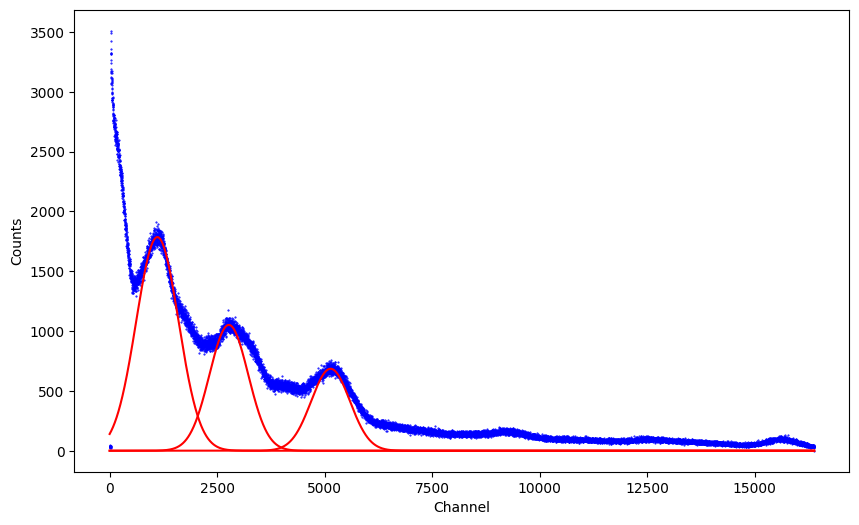

Gp3_data_E1/na22\Na22_804_3.csv
[1800, 1110, 300]
[3080.37644889 1104.01149976  500.        ]
Centre: 1104.0114997649655 +/- 499.9999999999999
[1050, 2800, 250]
[1816.56217061 2776.67431646  449.99998549]
Centre: 2776.6743164576806 +/- 449.9999854939203
[700, 5100, 250]
[1192.36257145 5125.69576193  386.95994814]
Centre: 5125.695761933172 +/- 386.959948142846


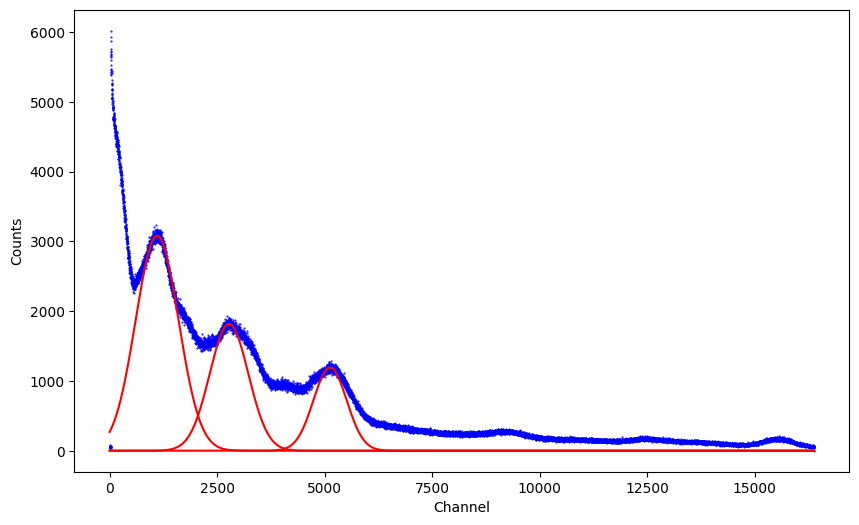

Gp3_data_E1/na22\Na22_804_3.csv
[1800, 1110, 300]
[3091.73054225 1105.43984637  489.9505986 ]
Centre: 1105.4398463735151 +/- 489.9505985965989
[1050, 2800, 250]
[1822.42818502 2766.04515787  450.        ]
Centre: 2766.0451578662014 +/- 449.99999999999994
[700, 5100, 250]
[1188.07561167 5115.58612477  450.        ]
Centre: 5115.586124772606 +/- 449.99999999999994


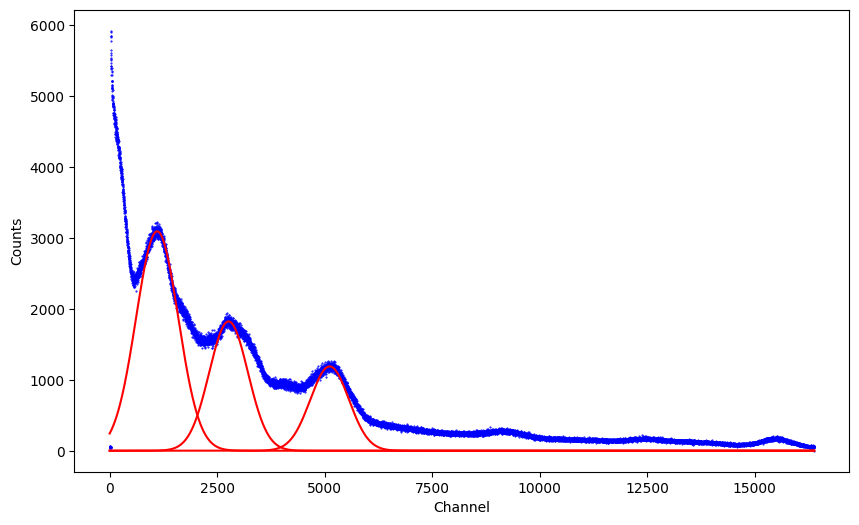

In [146]:
th02files = glob.glob('Gp3_data_E1/th02/*.csv')
with open("th232Fits.csv", "w") as fp:
    fp.write("Peak1,Peak1Error,Peak2,Peak2Error,Peak3,Peak3Error\n")
    for th02file in th02files:
        print(co60file)
        data = pd.read_csv(th02file, skiprows=6)
        #using poisson errors
        data["uncs"] = np.sqrt(data["Counts"]) + 1e-9
        plt.figure(figsize=(10, 6))
        plt.plot(data["Channel"], data["Counts"],'bo', label=th02file, markersize=0.5)
        p0s = [[1800, 1110, 300], [1050, 2800, 250], [700, 5100, 250]]
        for i, p0 in enumerate(p0s):
            print(p0)
            bounds = [[p0[0]-1500, p0[1]-200, p0[2]-200], [p0[0]+1500, p0[1]+200, p0[2]+200]]
            popt, pcov = curve_fit(gaussFit, data["Channel"].to_numpy()[p0[1]-100:p0[1]+100], data["Counts"].to_numpy()[p0[1]-100:p0[1]+100], p0=p0, bounds=bounds, sigma=data["uncs"].to_numpy()[p0[1]-100:p0[1]+100])
            print(popt)
            centre = popt[1]
            error = popt[2]
            # error = np.sqrt(np.diag(pcov))[1]
            if i == 0:
                fp.write(f"{centre},{error}")
            else:
                fp.write(f",{centre},{error}")
            
            print(f"Centre: {centre} +/- {error}")
            plt.plot(data["Channel"], gaussFit(data["Channel"], *popt), 'r-')
       
        plt.xlabel('Channel')
        plt.ylabel('Counts')
        plt.show()
        fp.write("\n")

Gp3_data_E1/na22\Na22_804_3.csv
[10000, 3000, 300]
[10754.57108101  3099.84565684   337.90102838]
Centre: 3099.8456568421643 +/- 337.90102838195014


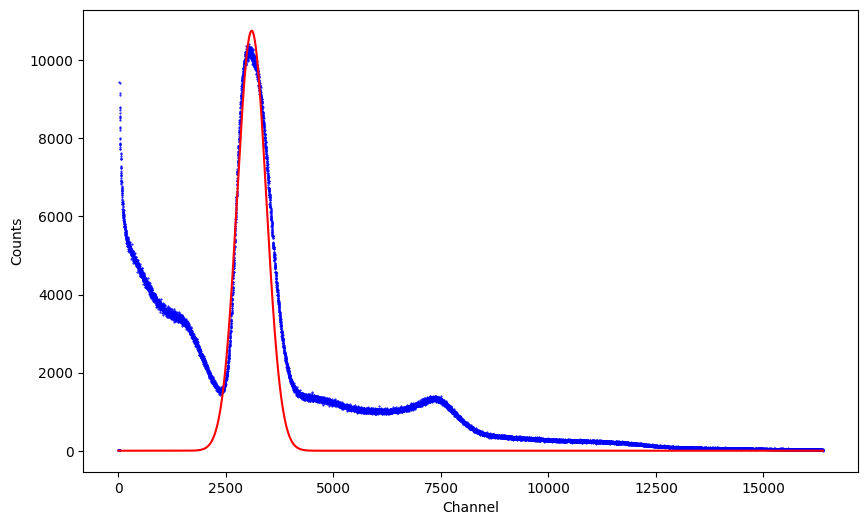

Gp3_data_E1/na22\Na22_804_3.csv
[10000, 3000, 300]
[10681.94475551  3061.58997856   363.54763901]
Centre: 3061.5899785615334 +/- 363.54763901332694


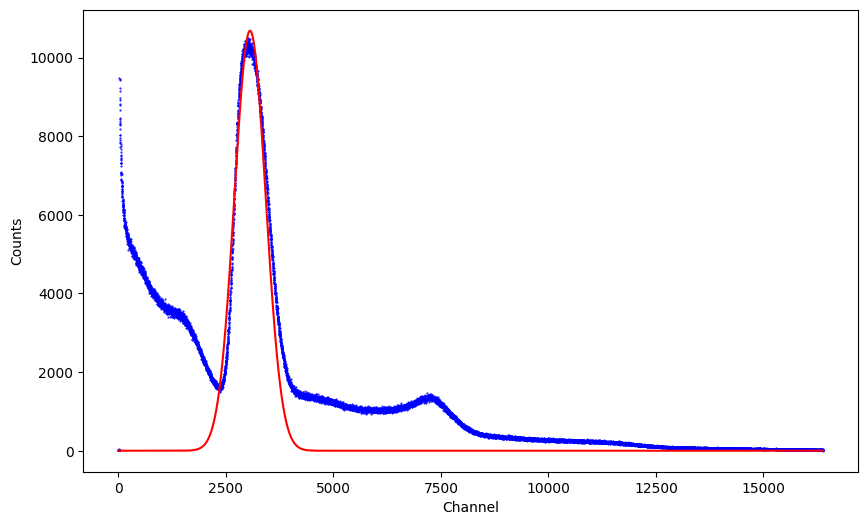

Gp3_data_E1/na22\Na22_804_3.csv
[10000, 3000, 300]
[10700.23788864  3009.82060899   394.41350097]
Centre: 3009.8206089949476 +/- 394.4135009725919


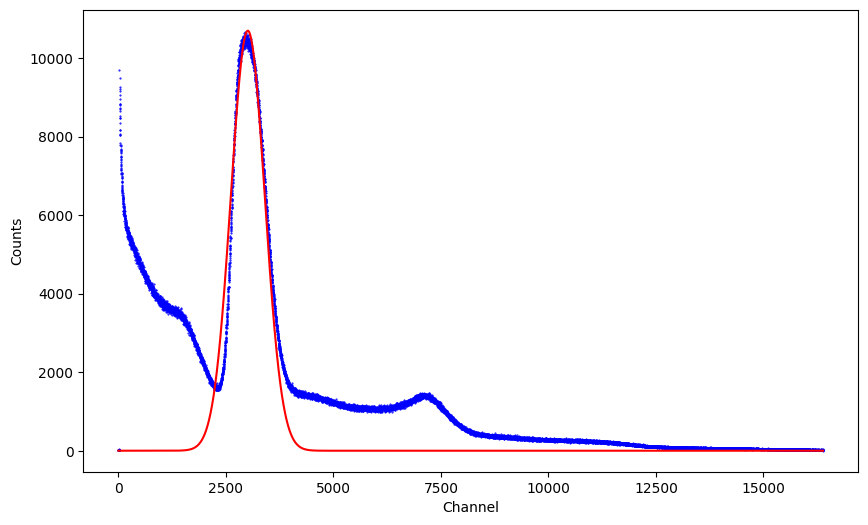

In [147]:
th02files = glob.glob('Gp3_data_E1/cs137/*.csv')
with open("cs137Fits.csv", "w") as fp:
    fp.write("Peak1,Peak1Error,Peak2,Peak2Error,Peak3,Peak3Error\n")
    for th02file in th02files:
        print(co60file)
        data = pd.read_csv(th02file, skiprows=6)
        #using poisson errors
        data["uncs"] = np.sqrt(data["Counts"]) + 1e-9
        plt.figure(figsize=(10, 6))
        plt.plot(data["Channel"], data["Counts"],'bo', label=th02file, markersize=0.5)
        p0s = [[10000, 3000, 300]]
        for i, p0 in enumerate(p0s):
            print(p0)
            bounds = [[p0[0]-1500, p0[1]-200, p0[2]-200], [p0[0]+1500, p0[1]+200, p0[2]+200]]
            popt, pcov = curve_fit(gaussFit, data["Channel"].to_numpy()[p0[1]-400:p0[1]+400], data["Counts"].to_numpy()[p0[1]-400:p0[1]+400], p0=p0, bounds=bounds, sigma=data["uncs"].to_numpy()[p0[1]-400:p0[1]+400])
            print(popt)
            centre = popt[1]
            error=popt[2]
            # error = np.sqrt(np.diag(pcov))[1]
            if i == 0:
                fp.write(f"{centre},{error}")
            else:
                fp.write(f",{centre},{error}")
            
            print(f"Centre: {centre} +/- {error}")
            plt.plot(data["Channel"], gaussFit(data["Channel"], *popt), 'r-')
       
        plt.xlabel('Channel')
        plt.ylabel('Counts')
        plt.show()
        fp.write("\n")